In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("https://rsearchprojectstorage1.blob.core.windows.net/dataset/pone.0200122.s003.csv2.csv")


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X

array([[ 2.   ,  1.535, 59.   , ...,  4.   ,  0.   , 22.   ],
       [ 2.   ,  1.6  , 35.2  , ...,  4.   ,  0.   , 22.   ],
       [ 2.   ,  1.565, 47.   , ...,  4.   ,  0.   , 22.   ],
       ...,
       [ 2.   ,  1.69 , 52.3  , ...,  1.   ,  0.   , 24.   ],
       [ 2.   ,  1.56 , 61.4  , ...,  1.   , 22.   ,  0.   ],
       [ 2.   ,  1.49 , 55.9  , ...,  4.   ,  0.   , 24.   ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.        , -0.31569997, -1.0671653 , ..., -0.66465187,
        -0.48987886, -0.21303   ],
       [ 0.        ,  0.18676312,  0.7512444 , ...,  1.18959984,
        -0.48987886, -0.21303   ],
       [ 0.        ,  0.56361044, -0.77317092, ..., -0.66465187,
        -0.48987886, -0.51795529],
       ...,
       [ 0.        , -0.06446842, -0.95827849, ..., -0.66465187,
         0.97574232, -1.28026852],
       [ 0.        ,  0.56361044, -0.01096326, ...,  1.18959984,
         0.97574232, -1.28026852],
       [ 0.        , -0.44131574, -0.87116905, ...,  1.18959984,
        -0.48987886,  0.39682058]])

In [ ]:
X_train.item

<function ndarray.item>

In [ ]:
y_train

array([0.33522727, 0.43181818, 0.25568182, 0.73295455, 0.64204545,
       0.57386364, 0.64772727, 0.57386364, 0.60227273, 0.5625    ,
       0.27840909, 0.53409091, 0.50568182, 0.57386364, 0.44886364,
       0.59659091, 0.59659091, 0.59659091, 0.55681818, 0.49431818,
       0.57386364, 0.59659091, 0.60795455, 0.52840909, 0.52840909,
       0.58522727, 0.59659091, 0.69886364, 0.59659091, 0.65340909,
       0.40340909, 0.52840909, 0.60795455, 0.30113636, 0.59090909,
       0.59659091, 0.66477273, 0.51704545, 0.4375    , 0.56818182,
       0.64204545, 0.625     , 0.51704545, 0.30113636, 0.64204545,
       0.67613636, 0.63636364, 0.5625    , 0.625     , 0.54545455,
       0.72159091, 0.5625    , 0.63068182, 0.53977273, 0.61363636,
       0.41477273, 0.61931818, 0.64204545, 0.47159091, 0.51704545,
       0.3125    , 0.52840909, 0.26704545, 0.68181818, 0.36931818,
       0.60795455, 0.6875    , 0.55113636, 0.34090909, 0.68181818,
       0.58522727, 0.59659091, 0.58522727, 0.33522727, 0.59659

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boosting model object
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Mean Squared Error: 0.0001947249468193634
Root Mean Squared Error: 0.013954388084733899
R^2 Score: 0.9752837095108294


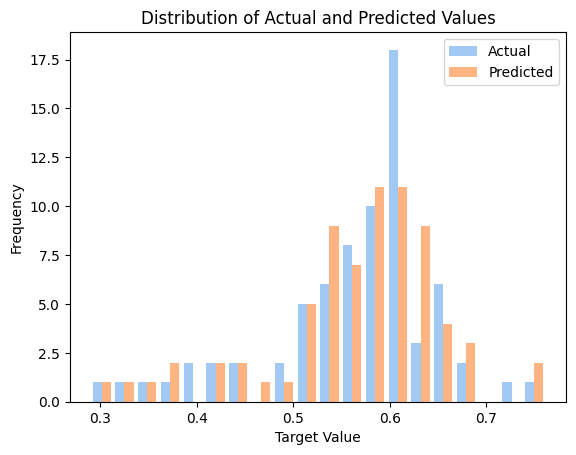

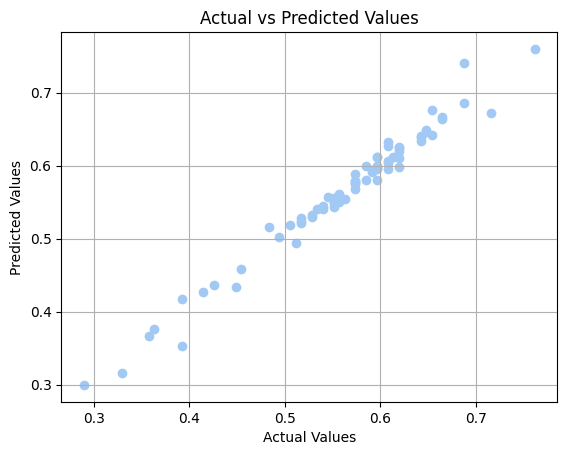

In [ ]:

fig, ax = plt.subplots()
ax.hist([y_test, y_pred], bins=20, label=['Actual', 'Predicted'])
ax.set_xlabel('Target Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual and Predicted Values')
ax.legend()

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual vs Predicted Values')
ax.grid(True)

plt.show()

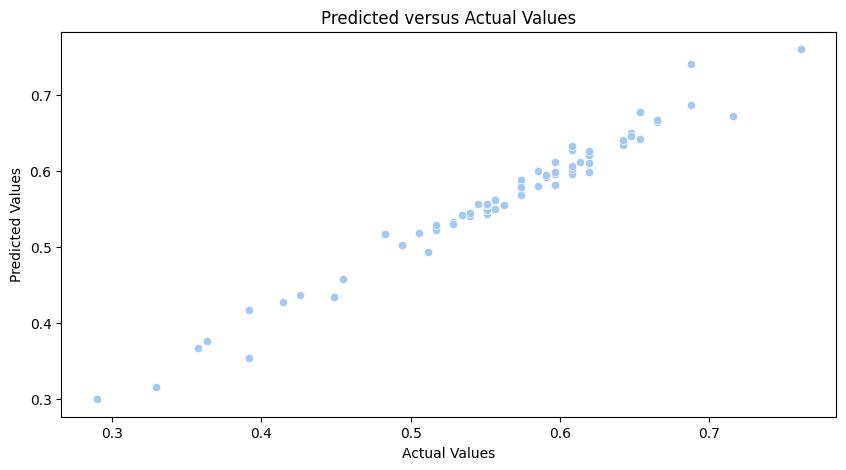

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted versus Actual Values")
plt.show()






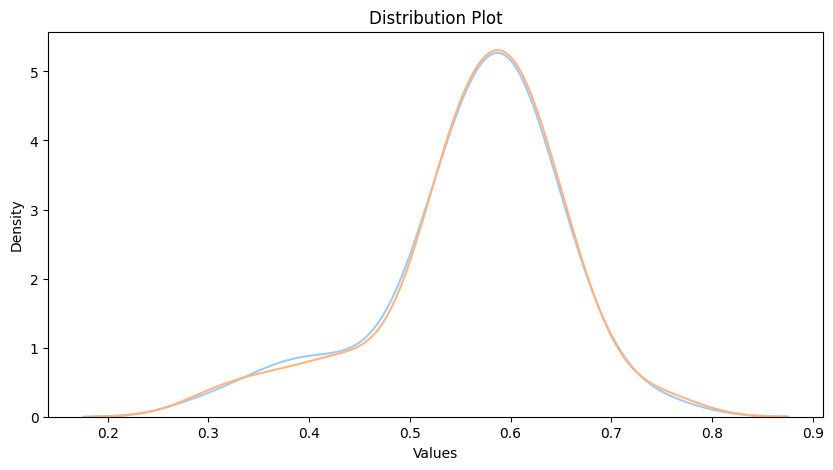

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, label="Actual Values", )
sns.kdeplot(y_pred, label="Predicted Values")
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution Plot")
plt.show()

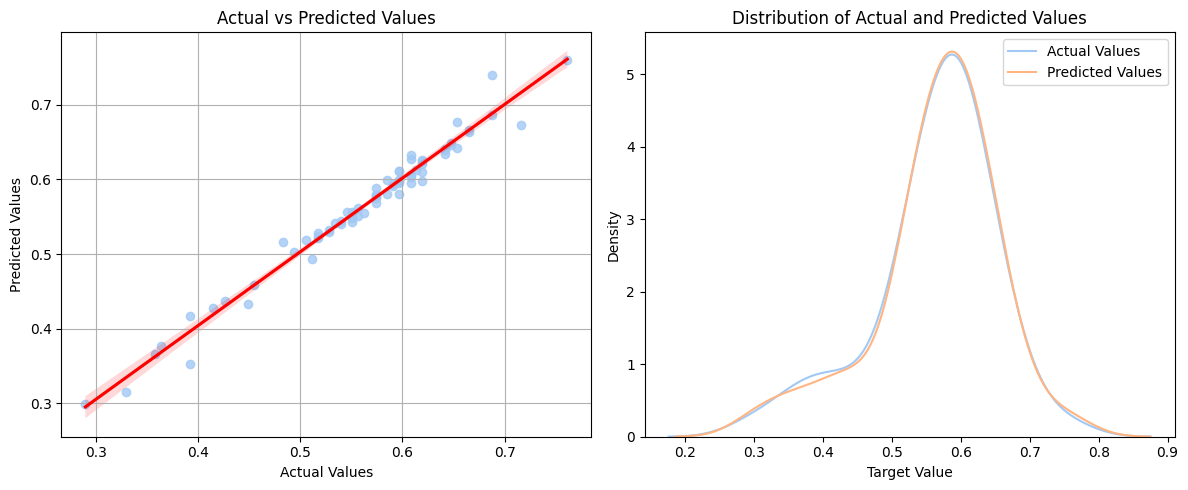

In [ ]:
sns.set_palette('pastel')

# Create scatter plot with regression line
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'}, ax=axs[0])
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values')
axs[0].grid(True)

# Create distribution plot

sns.kdeplot(y_test, label="Actual Values", )
sns.kdeplot(y_pred, label="Predicted Values")
axs[1].set_xlabel('Target Value')
axs[1].set_ylabel('Density')
axs[1].set_title('Distribution of Actual and Predicted Values')
axs[1].legend()



plt.tight_layout()
plt.show()

## Providing Explanation using LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

# Load SHAP explainer and compute SHAP values for the test data
explainer = shap.Explainer(model)
shap_values = explainer(X_test)



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


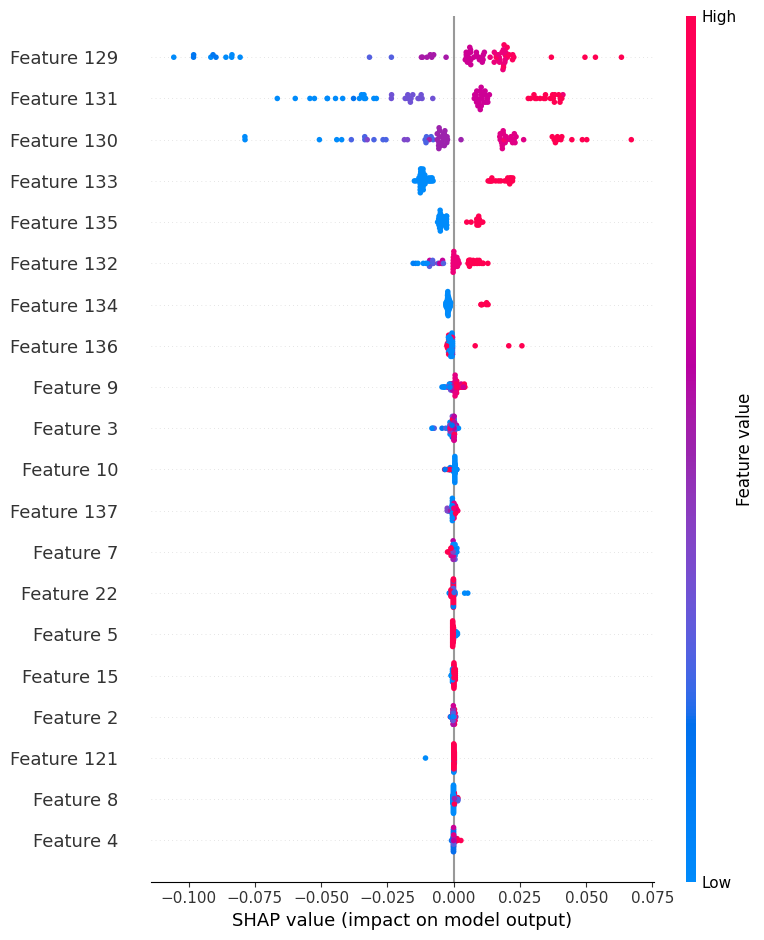

In [ ]:
shap.summary_plot(shap_values, X_test, )


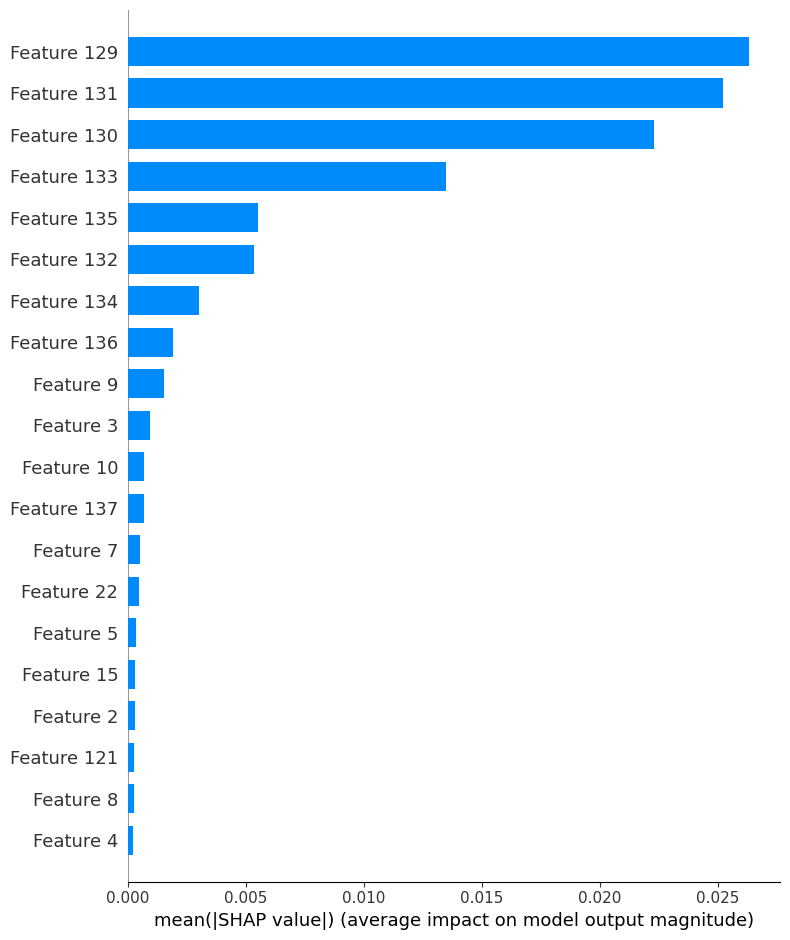

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


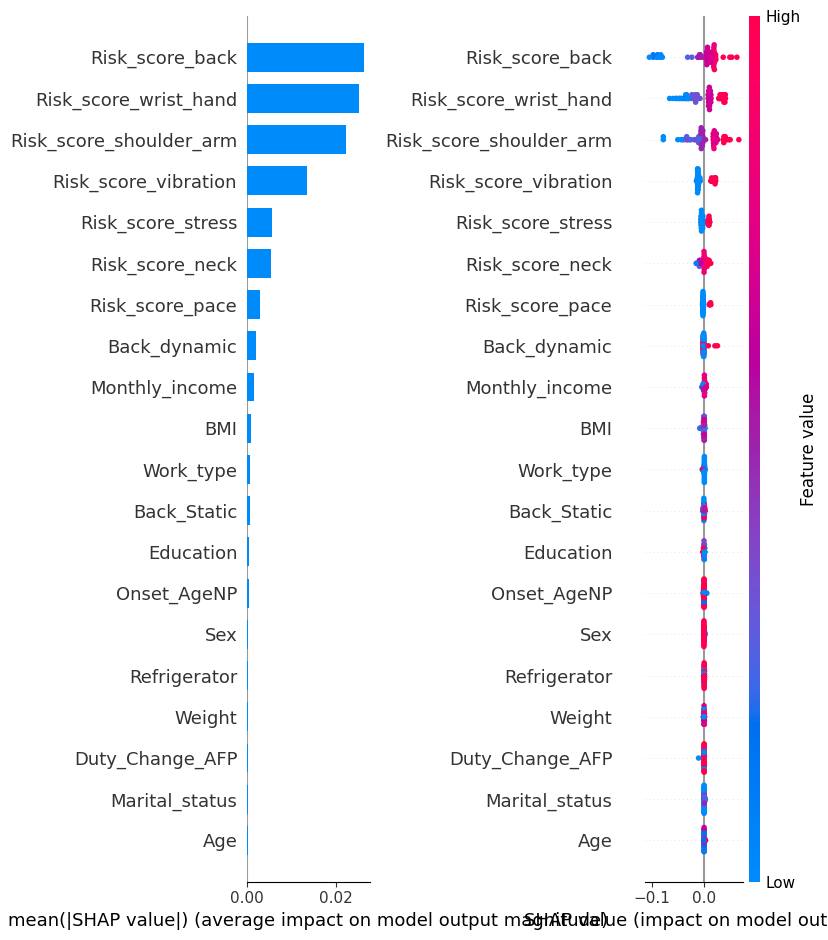

In [ ]:
# Load feature names (if available)
feature_names = ("Duration","Heigh",
"Weight",
"BMI",
"Age",
"Sex",
"Religion",
"Education",
"Marital_status",
"Monthly_income",
"Work_type",
"TV",
"Fan",
"Electricity",
"Wardrobe",
"Refrigerator",
"Bank_account",
"Floor_material",
"Wall_material",
"Daily_workhours",
"Daily_Overtimehours",
"Neck_pain",
"Onset_AgeNP",
"Duration_MonthsNP",
"Hospitalized_NP",
"Duty_ChangeNP",
"Had_trouble_12Months_NP",
"Had_trouble_1month_NP",
"Had_trouble_today_NP",
"Work_prevented_NP",
"Seen_doctor_NP",
"Medication_NP",
"Sick_leave_NP",
"Shoulder_pain",
"Onset_AgeSP",
"Duration_Months_SP",
"Hospitalized_SP",
"Duty_Change_SP",
"Had_trouble_12Months_SP",
"Had_trouble_1month_SP",
"Had_trouble_today_SP",
"Work_prevented_SP",
"Seen_doctor_SP",
"Medication_SP",
"Sick_leave_SP",
"Upper_Back_pain",
"Onset_Age_UBP",
"Duration_Months_UBP",
"Hospitalized_UBP",
"Duty_Change_UBP",
"Had_trouble_12Months_UBP",
"Had_trouble_1month_UBP",
"Had_trouble_today_UBP",
"Work_prevented_UBP",
"Seen_doctor_UBP",
"Medication_UBP",
"Sick_leave_UBP",
"Elbow_pain",
"Onset_Age_EP",
"Duration_Months_EP",
"Hospitalized_EP",
"Duty_Change_EP",
"Had_trouble_12Months_EP",
"Had_trouble_1month_EP",
"Had_trouble_today_EP",
"Work_prevented_EP",
"Seen_doctor_EP",
"Medication_EP",
"Sick_leave_EP",
"Wrist_hand_pain",
"Onset_Age_WHP",
"Duration_Months_WHP",
"Hospitalized_WHP",
"Duty_Change_WHP",
"Had_trouble_12Months_WHP",
"Had_trouble_1month_WHP",
"Had_trouble_today_WHP",
"Work_prevented_WHP",
"Seen_doctor_WHP",
"Medication_WHP",
"Sick_leave_WHP",
"Lower_Back_pain",
"Onset_Age_LBP",
"Duration_Months_LBP",
"Hospitalized_LBP",
"Duty_Change_LBP",
"Had_trouble_12Months_LBP",
"Had_trouble_1month_LBP",
"Had_trouble_today_LBP",
"Work_prevented_LBP",
"Seen_doctor_LBP",
"Medication_LBP",
"Sick_leave_LBP",
"Hip_Thigh_pain",
"Onset_Age_HTP",
"Duration_Months_HTP",
"Hospitalized_HTP",
"Duty_Change_HTP",
"Had_trouble_12Months_HTP",
"Had_trouble_1month_HTP",
"Had_trouble_today_HTP",
"Work_prevented_HTP",
"Seen_doctor_HTP",
"Medication_HTP",
"Sick_leave_HTP",
"Knee_pain",
"Onset_Age_KP",
"Duration_Months_KP",
"Hospitalized_KP",
"Duty_Change_KP",
"Had_trouble_12Months_KP",
"Had_trouble_1month_KP",
"Had_trouble_today_KP",
"Work_prevented_KP",
"Seen_doctor_KP",
"Medication_KP",
"Sick_leave_KP",
"Ankle_Feet_pain",
"Onset_Age_AFP",
"Duration_Months_AFP",
"Hospitalized_AFP",
"Duty_Change_AFP",
"Had_trouble_12Months_AFP",
"Had_trouble_1month_AFP",
"Had_trouble_today_AFP",
"Work_prevented_AFP",
"Seen_doctor_AFP",
"Medication_AFP",
"Sick_leave_AFP",
"Risk_score_back",
"Risk_score_shoulder_arm",
"Risk_score_wrist_hand",
"Risk_score_neck",
"Risk_score_vibration",
"Risk_score_pace",
"Risk_score_stress",
"Back_dynamic",
"Back_Static",
"Overall_risk_exposure")

# Generate a summary plot for all the features using bar plot
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=feature_names, show=False)

# Generate a summary plot for all the features using dot plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)

# Display the plots side by side
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=feature_names, show=False)
plt.subplot(1, 2, 2)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)

plt.show()


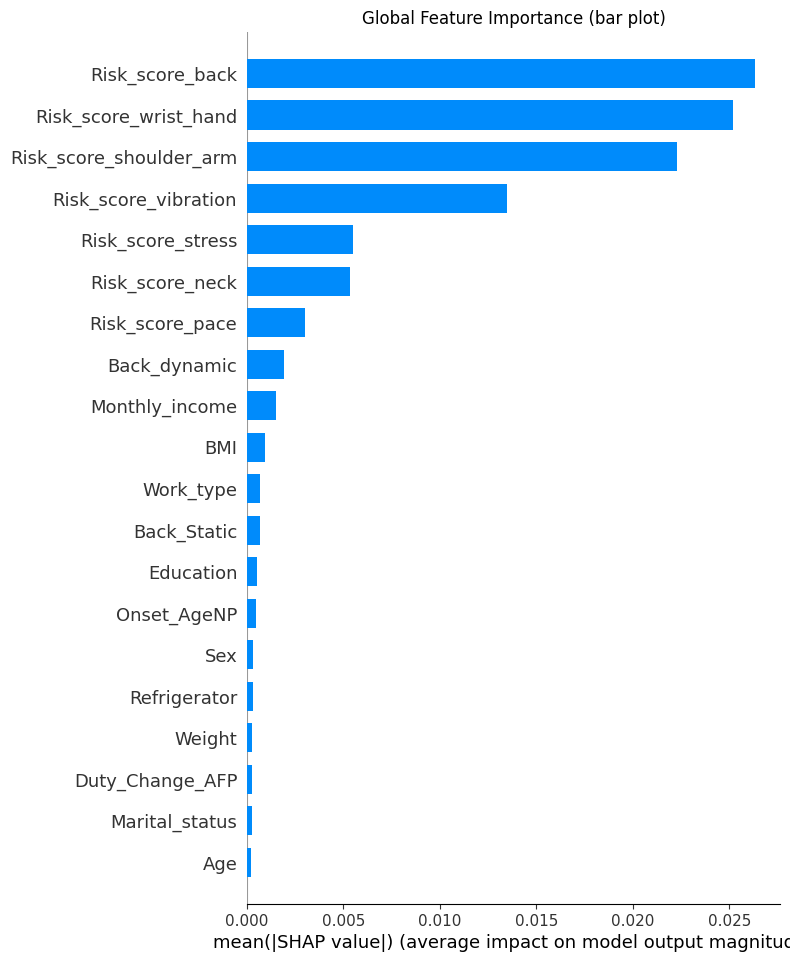

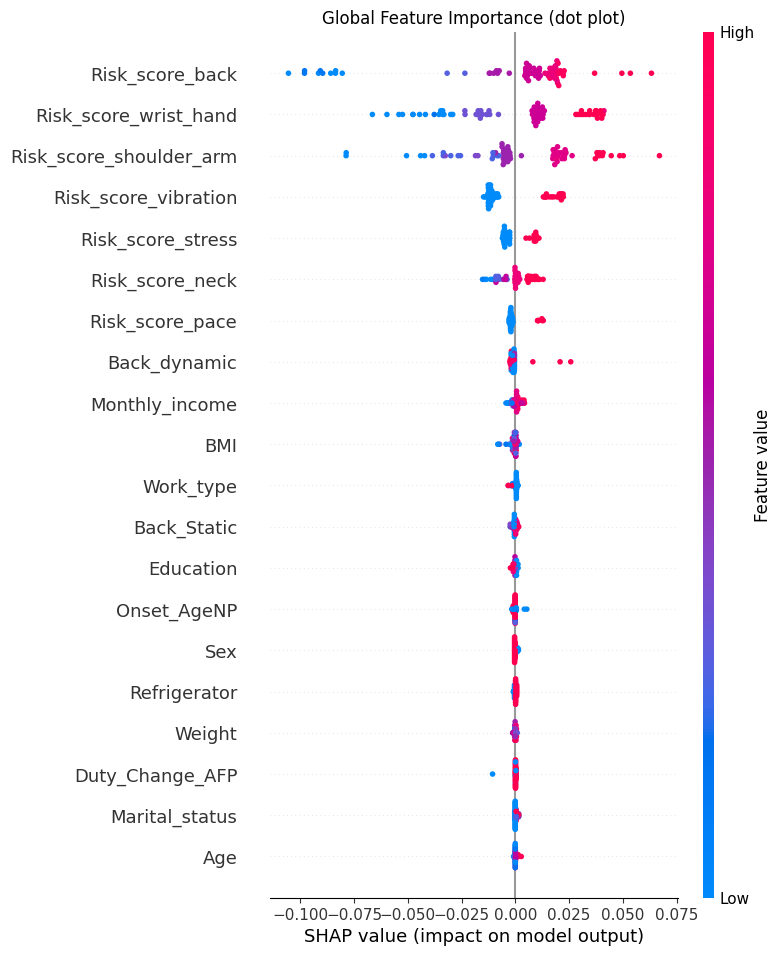

In [ ]:
# Load feature names (if available)
feature_names = ("Duration","Heigh",
"Weight",
"BMI",
"Age",
"Sex",
"Religion",
"Education",
"Marital_status",
"Monthly_income",
"Work_type",
"TV",
"Fan",
"Electricity",
"Wardrobe",
"Refrigerator",
"Bank_account",
"Floor_material",
"Wall_material",
"Daily_workhours",
"Daily_Overtimehours",
"Neck_pain",
"Onset_AgeNP",
"Duration_MonthsNP",
"Hospitalized_NP",
"Duty_ChangeNP",
"Had_trouble_12Months_NP",
"Had_trouble_1month_NP",
"Had_trouble_today_NP",
"Work_prevented_NP",
"Seen_doctor_NP",
"Medication_NP",
"Sick_leave_NP",
"Shoulder_pain",
"Onset_AgeSP",
"Duration_Months_SP",
"Hospitalized_SP",
"Duty_Change_SP",
"Had_trouble_12Months_SP",
"Had_trouble_1month_SP",
"Had_trouble_today_SP",
"Work_prevented_SP",
"Seen_doctor_SP",
"Medication_SP",
"Sick_leave_SP",
"Upper_Back_pain",
"Onset_Age_UBP",
"Duration_Months_UBP",
"Hospitalized_UBP",
"Duty_Change_UBP",
"Had_trouble_12Months_UBP",
"Had_trouble_1month_UBP",
"Had_trouble_today_UBP",
"Work_prevented_UBP",
"Seen_doctor_UBP",
"Medication_UBP",
"Sick_leave_UBP",
"Elbow_pain",
"Onset_Age_EP",
"Duration_Months_EP",
"Hospitalized_EP",
"Duty_Change_EP",
"Had_trouble_12Months_EP",
"Had_trouble_1month_EP",
"Had_trouble_today_EP",
"Work_prevented_EP",
"Seen_doctor_EP",
"Medication_EP",
"Sick_leave_EP",
"Wrist_hand_pain",
"Onset_Age_WHP",
"Duration_Months_WHP",
"Hospitalized_WHP",
"Duty_Change_WHP",
"Had_trouble_12Months_WHP",
"Had_trouble_1month_WHP",
"Had_trouble_today_WHP",
"Work_prevented_WHP",
"Seen_doctor_WHP",
"Medication_WHP",
"Sick_leave_WHP",
"Lower_Back_pain",
"Onset_Age_LBP",
"Duration_Months_LBP",
"Hospitalized_LBP",
"Duty_Change_LBP",
"Had_trouble_12Months_LBP",
"Had_trouble_1month_LBP",
"Had_trouble_today_LBP",
"Work_prevented_LBP",
"Seen_doctor_LBP",
"Medication_LBP",
"Sick_leave_LBP",
"Hip_Thigh_pain",
"Onset_Age_HTP",
"Duration_Months_HTP",
"Hospitalized_HTP",
"Duty_Change_HTP",
"Had_trouble_12Months_HTP",
"Had_trouble_1month_HTP",
"Had_trouble_today_HTP",
"Work_prevented_HTP",
"Seen_doctor_HTP",
"Medication_HTP",
"Sick_leave_HTP",
"Knee_pain",
"Onset_Age_KP",
"Duration_Months_KP",
"Hospitalized_KP",
"Duty_Change_KP",
"Had_trouble_12Months_KP",
"Had_trouble_1month_KP",
"Had_trouble_today_KP",
"Work_prevented_KP",
"Seen_doctor_KP",
"Medication_KP",
"Sick_leave_KP",
"Ankle_Feet_pain",
"Onset_Age_AFP",
"Duration_Months_AFP",
"Hospitalized_AFP",
"Duty_Change_AFP",
"Had_trouble_12Months_AFP",
"Had_trouble_1month_AFP",
"Had_trouble_today_AFP",
"Work_prevented_AFP",
"Seen_doctor_AFP",
"Medication_AFP",
"Sick_leave_AFP",
"Risk_score_back",
"Risk_score_shoulder_arm",
"Risk_score_wrist_hand",
"Risk_score_neck",
"Risk_score_vibration",
"Risk_score_pace",
"Risk_score_stress",
"Back_dynamic",
"Back_Static")
fig1, ax1 = plt.subplots(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=feature_names, show=False)
ax1.set_title('Global Feature Importance (bar plot)')

# Generate a summary plot for all the features using dot plot
fig2, ax2 = plt.subplots(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
ax2.set_title('Global Feature Importance (dot plot)')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

plt.show()


In [ ]:
!pip install shap
import shap

shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
shap.initjs()

In [ ]:

shap.initjs()

In [ ]:
shap.plots.force(shap_values[2])

##Explanation by Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


In [ ]:
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

In [ ]:
feature_names = list(df.columns[:-1])

In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42,
                                n_jobs=-1)

In [ ]:
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))






1. Risk_score_back (0.292071)
2. Risk_score_shoulder_arm (0.235306)
3. Risk_score_wrist_hand (0.180964)
4. Risk_score_vibration (0.064919)
5. Risk_score_neck (0.016969)
6. Risk_score_stress (0.009960)
7. Monthly_income (0.004088)
8. Risk_score_pace (0.003800)
9. Back_dynamic (0.002397)
10. BMI (0.002142)
11. Work_type (0.001772)
12. Back_Static (0.001168)
13. Age (0.000825)
14. Duration_MonthsNP (0.000667)
15. Marital_status (0.000409)
16. Education (0.000345)
17. Duty_Change_AFP (0.000242)
18. Weight (0.000161)
19. Upper_Back_pain (0.000142)
20. Wardrobe (0.000136)
21. Onset_AgeSP (0.000095)
22. Lower_Back_pain (0.000086)
23. Heigh (0.000054)
24. Floor_material (0.000053)
25. Sick_leave_LBP (0.000052)
26. Knee_pain (0.000035)
27. Onset_Age_UBP (0.000035)
28. Duration_Months_LBP (0.000029)
29. Duration_Months_SP (0.000018)
30. Work_prevented_NP (0.000017)
31. Duty_ChangeNP (0.000013)
32. Duration_Months_AFP (0.000008)
33. Hospitalized_KP (0.000007)
34. Ankle_Feet_pain (0.000005)
35. Me

## Using ASV SHAP XAI

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model)  ## Initialize the SHapley explainer

In [ ]:
shap_values = explainer(X_test) ## Generate the SHapley values for the test data

In [ ]:
shap_values = explainer(X_test)

In [ ]:
#use the ASV XAI model to calculate the contribution of each feature to the final prediction. The ASV model takes the SHapley values as input and outputs the ASV values:

# Define the ASV XAI model
def asv_xai(shap_values):
    # Calculate the positive and negative contributions for each feature
    pos_contributions = np.maximum(shap_values.values, 0)
    neg_contributions = np.minimum(shap_values.values, 0)

    # Calculate the sum of positive and negative contributions for each feature
    pos_sum = np.sum(pos_contributions, axis=0)
    neg_sum = np.sum(neg_contributions, axis=0)

    # Calculate the ASV values for each feature
    asv_values = pos_sum / (pos_sum + neg_sum)

    return asv_values

# Calculate the ASV values for the test data
asv_values = asv_xai(shap_values)

invalid value encountered in true_divide


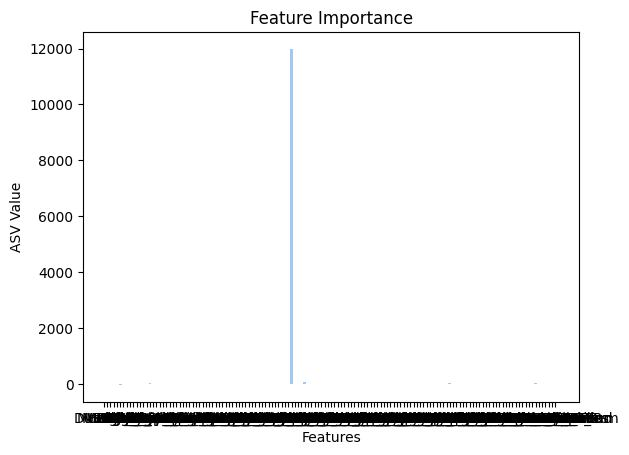

In [ ]:
# Define the feature names
#feature_names = X.columns

# Create a bar chart of the ASV values
plt.bar(feature_names, asv_values)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('ASV Value')
plt.title('Feature Importance')
plt.show()

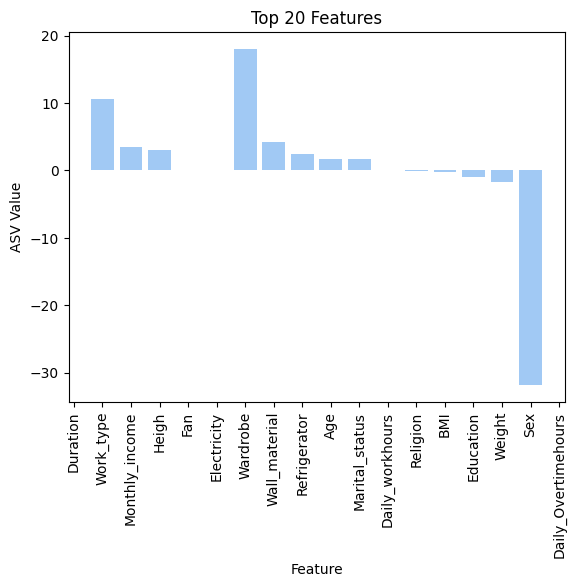

In [ ]:
# Sort the ASV values in descending order
sorted_asv = sorted(zip(feature_names, asv_values), key=lambda x: x[1], reverse=True)

# Extract the top 20 features and their ASV values
top_features = [x[0] for x in sorted_asv[:20]]
top_asv_values = [x[1] for x in sorted_asv[:20]]

# Create a bar chart of the top 20 features and their ASV values
plt.bar(top_features, top_asv_values)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('ASV Value')
plt.title('Top 20 Features')
plt.xticks(rotation=90)
plt.show()

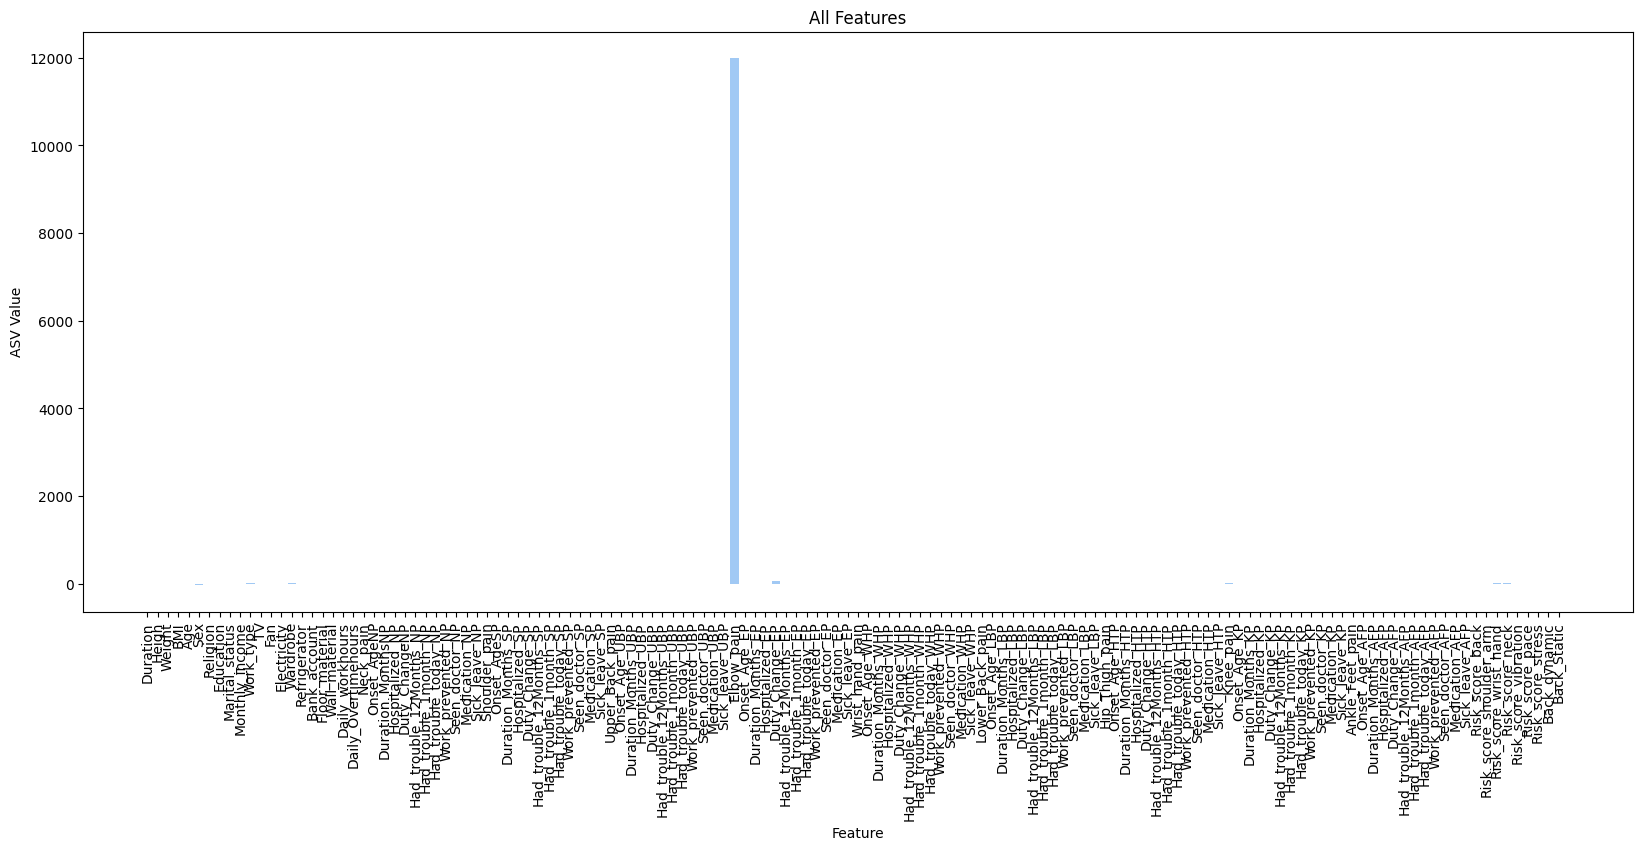

In [ ]:
# Create a bar chart of all the features and their ASV values
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(feature_names, asv_values)

# Add labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('ASV Value')
ax.set_title('All Features')

# Rotate x-axis labels by 90 degrees and set sufficient space between them
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)

# Show the plot
plt.show()

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
from eli5 import show_weights
from eli5 import show_prediction



In [ ]:
# Generate an explanation for the model prediction using Eli5
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
explanation = eli5.show_weights(perm, feature_names = feature_names, target_names=['Overall_risk_exposure'])


In [ ]:
importances_df = eli5.formatters.as_dataframe.explain_weights_df(perm)

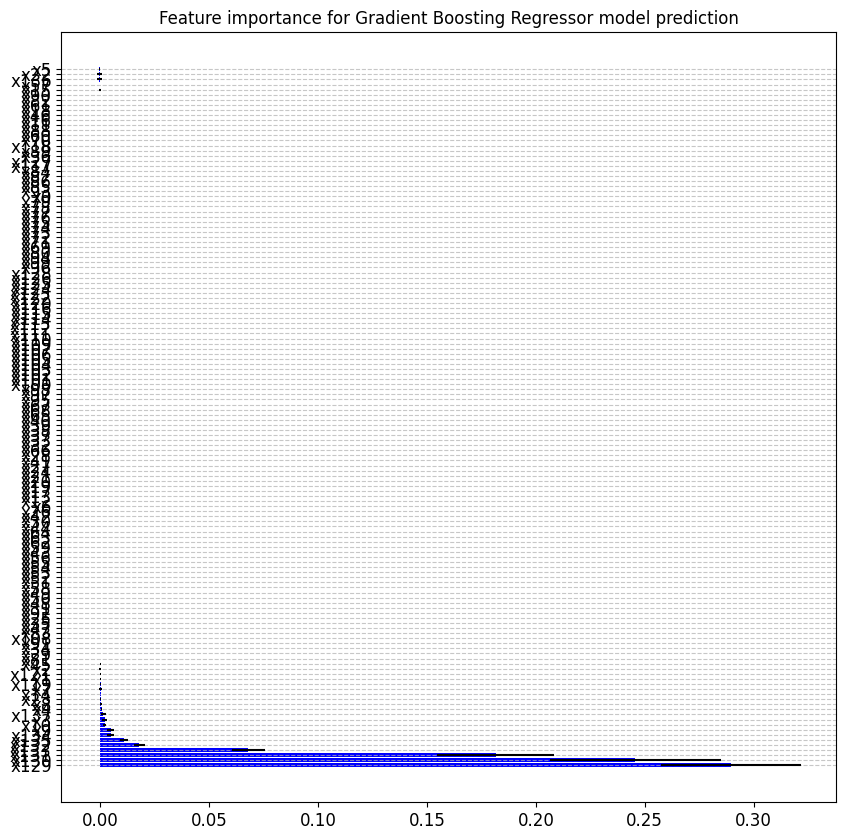

In [ ]:
# Visualize the feature importances
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_title("Feature importance for Gradient Boosting Regressor model prediction")
ax.tick_params(labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.barh(importances_df['feature'],
        importances_df['weight'],
        xerr=importances_df['std'],
        color='blue')
plt.show()

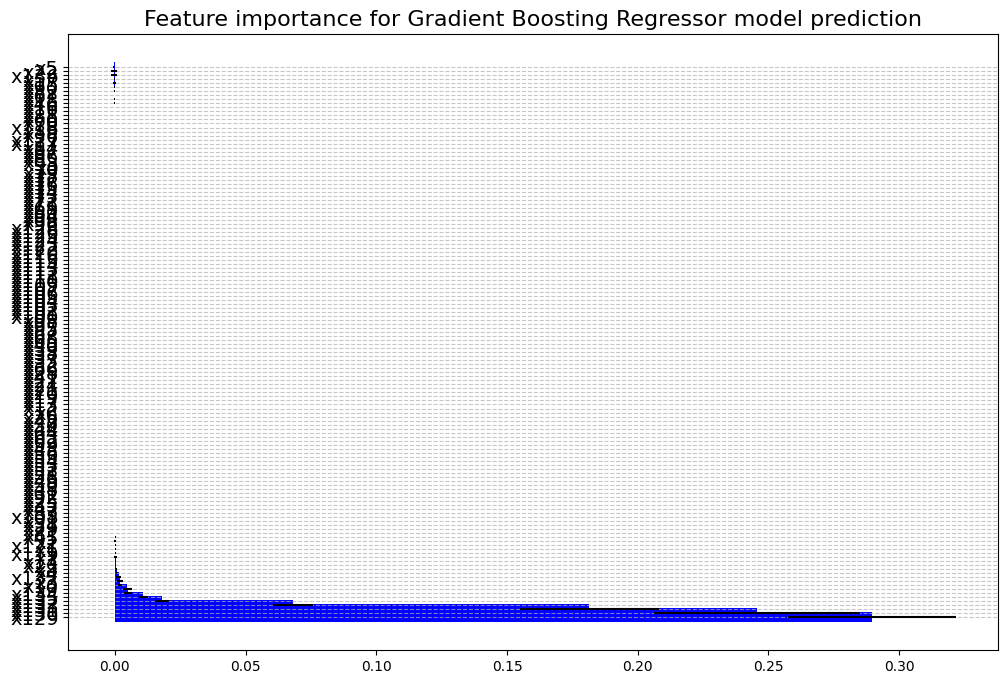

In [ ]:
# Visualize the feature importances
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Feature importance for Gradient Boosting Regressor model prediction", fontsize=16)
ax.tick_params(labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set the font size of the Y-axis labels and rotate them by 45 degrees
plt.yticks(fontsize=14)
plt.xticks(rotation=0)

# Set the width of the bars
bar_width = 2.5

# Plot the horizontal bars with the specified width
ax.barh(importances_df['feature'],
        importances_df['weight'],
        xerr=importances_df['std'],
        height=bar_width,
        color='blue')

plt.show()





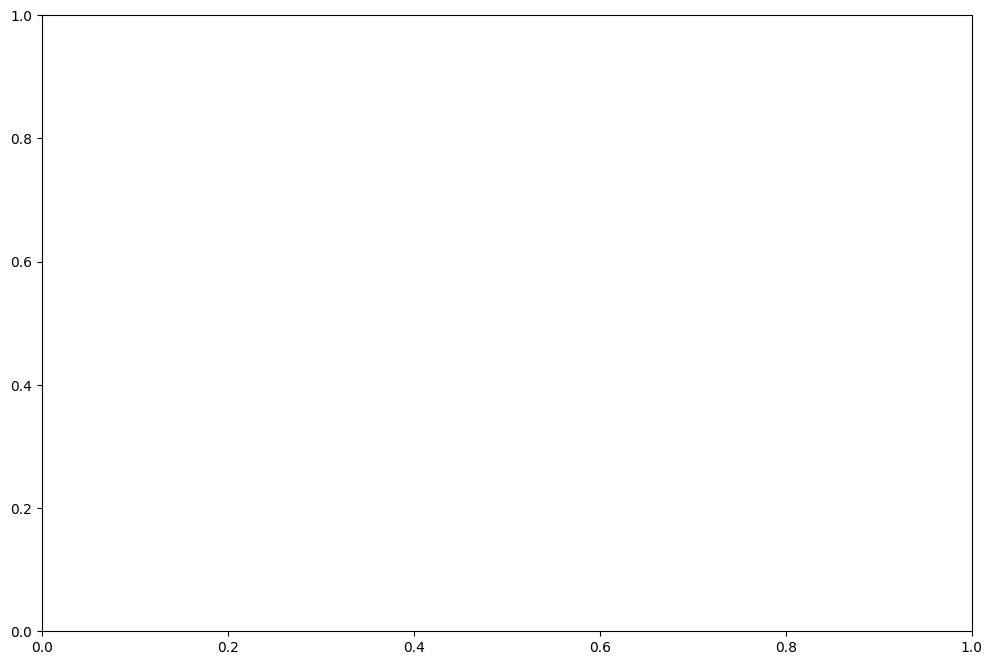

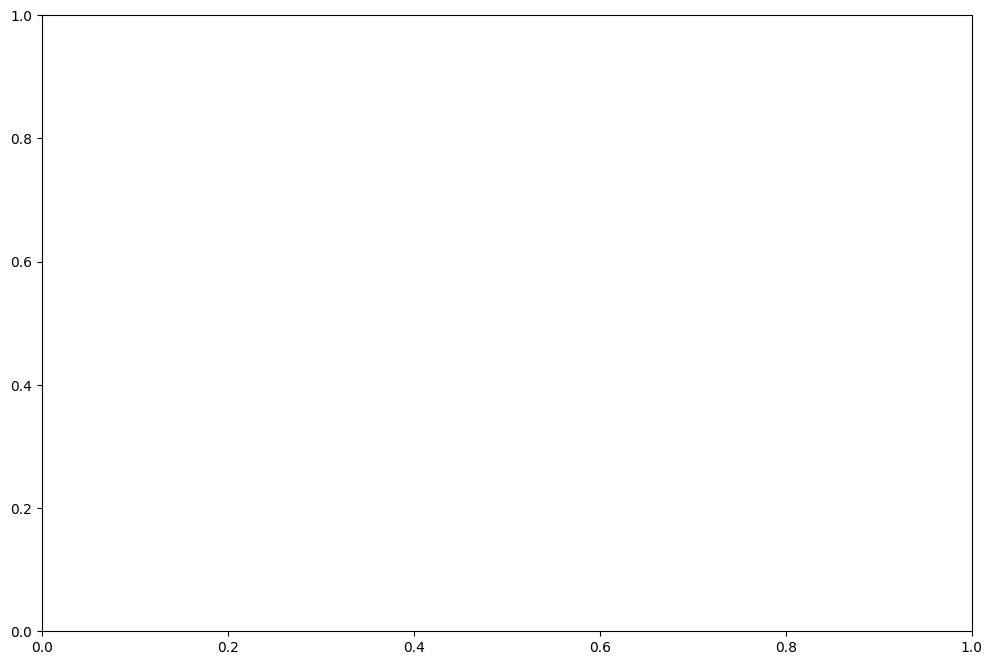

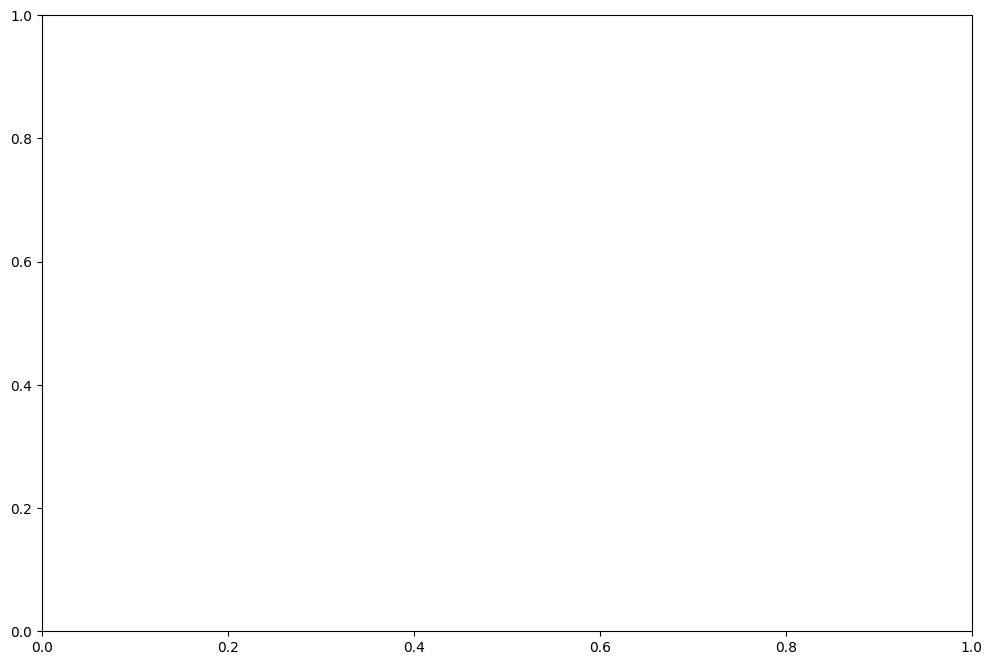

AttributeError: ignored

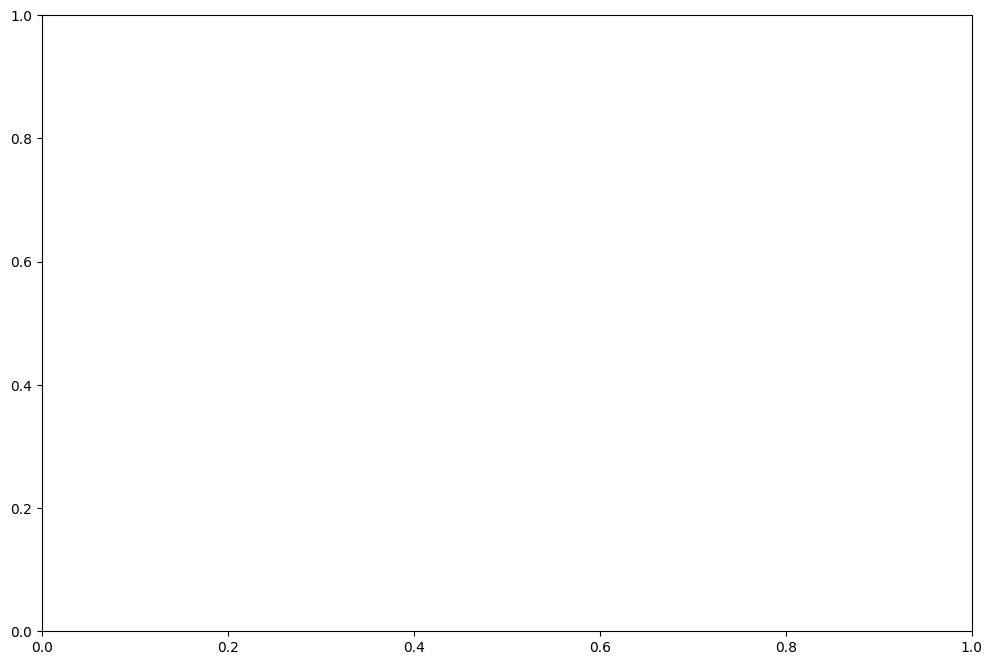

In [ ]:
# Feature importances plot using permutation importance
perm = PermutationImportance(model).fit(X, y)
fig, ax = plt.subplots(figsize=(12, 8))
eli5.show_weights(perm, feature_names=feature_names, top=None)
plt.show()

# Partial dependence plot for the 'RM' feature
fig, ax = plt.subplots(figsize=(12, 8))
#eli5.show_prediction(model, X.iloc[0], feature_names=feature_names, targets=['Overall_risk_exposure'], ax=ax)
plt.show()

# Decision tree visualization for the first tree in the model
fig, ax = plt.subplots(figsize=(12, 8))
eli5.show_weights(model, target_names=['Overall_risk_exposure'], feature_names=feature_names, show=['tree'], top=None)
plt.show()

# LIME visualization for the first instance in the dataset
fig, ax = plt.subplots(figsize=(12, 8))
eli5.show_prediction(model, X.iloc[0], feature_names=feature_names, targets=['Overall_risk_exposure'], show_feature_values=True, ax=ax)
plt.show()







